In [1]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#this is my variance
a=[8,0,4,1,-2,7]
b=np.mean(a)
c=[]
for i in range(len(a)):
    c.append(b-a[i])
c=sum(c)
variance=1/(len(a)-1)
print(variance)
print("from numpy package:",np.var(a,ddof=1))  #if we dont set ddof to 1 it will calculate the population variance but we want sampl

0.2
from numpy package: 16.0


In [3]:
d1=[1,2,3,3,2,1]
d2=[101,102,103,103,102,101]
print(f"varince of the first one is: {np.var(d1,ddof=1)} and the second one: {np.var(d2,ddof=1)}")

varince of the first one is: 0.8 and the second one: 0.8


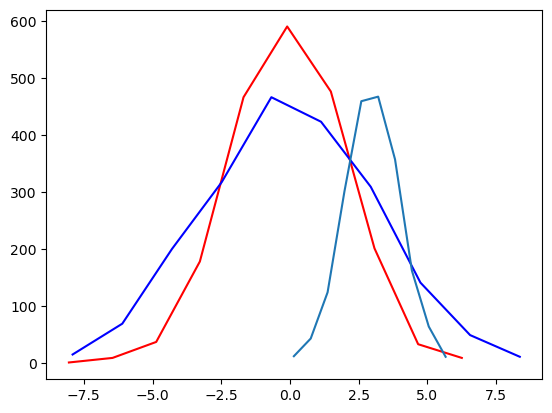

In [8]:
n=2000
a=np.random.randn(n)
b=-3*np.random.randn(n)
c=np.random.randn(n)+3

#lets make the mean values
mean_1=np.mean(a)
mean_2=np.mean(b)
mean_3=np.mean(c)

#lets exclude the first and last bins
y1,x1=np.histogram(a)
x1=(x1[1:]+x1[:-1])/1

y2,x2=np.histogram(b)
x2=(x2[1:]+x2[:-1])/2

y3,x3=np.histogram(c)
x3=(x3[1:]+x3[:-1])/2

#lets plot the values
plt.plot(x1,y1,color='r')
plt.plot(x2,y2,color='b')
plt.plot(x3,y3)
plt.show()

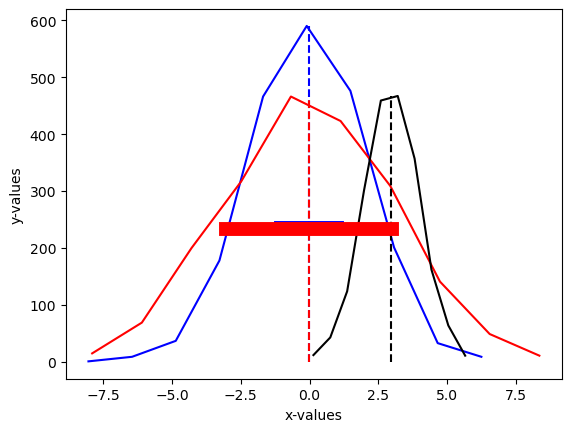

In [26]:
#stdss...
std=np.zeros(3)

#lets compute
std[0]=np.std(a,ddof=1)
std[1]=np.std(b,ddof=1)
std[2]=np.std(c,ddof=1)

#lets plot the values
plt.plot(x1,y1,'b',x2,y2,'r',x3,y3,'k')
plt.plot([mean_1,mean_1],[0,max(y1)],'b--',[mean_2,mean_2],[0,max(y2)],'r--',[mean_3,mean_3],[0,max(y3)],'k--')

#with standard devaiation
plt.plot([mean_1-std[0],mean_2+std[0]],[.4*max(y1),.4*max(y1)],'b',linewidth=10)
plt.plot([mean_2-std[1],mean_2+std[1]],[.5*max(y2),.5*max(y2)],'r',linewidth=10)
plt.plot([mean_3-std[2],mean_3+std[2]],[.6*max(y3),.6*max(y3)],'k',linewidth=10)
plt.xlabel("x-values")
plt.ylabel("y-values")
plt.show()

In [9]:
mean_val=10.2
std_val=7.5
sample=100

z=np.random.normal(mean_val,std_val,sample)

In [10]:
z

array([ 13.89900679,   3.43222441,   5.89414347,  13.42089439,
        -1.82931374,  15.30567613,   6.85710758,  10.53974619,
         4.59030974,  30.18665203,  10.26939149,  19.60819365,
         7.82879494,   2.68697926,  17.45746324,  11.95646684,
         9.96455534,   6.1365554 ,  18.07264504,   2.52754742,
         5.21045101,   5.4691554 ,  -0.66242124,   7.46459423,
         8.09364137,   5.0130692 ,   6.7335749 ,  14.95937189,
        -0.6955149 ,   1.98334006,   1.09199188,   0.71045005,
         7.44082705,  -1.83670953,   3.01196765,  -4.99186683,
       -13.66259968,  13.25733836,  -1.05473912,  22.8312616 ,
         6.62752356,  13.29156103,   6.88640956,  16.65223738,
        15.58823295,  11.57372343,  -2.92807568,  12.90858455,
         3.69901929,  -0.6796969 ,   9.54459942,  10.54636939,
         5.8162224 ,  11.19259624,   2.24363813,  18.29736316,
        20.90989401,   3.62104312,   9.73768838,  13.12247258,
        17.81487232,   2.59230361,  -4.41723718,  12.77

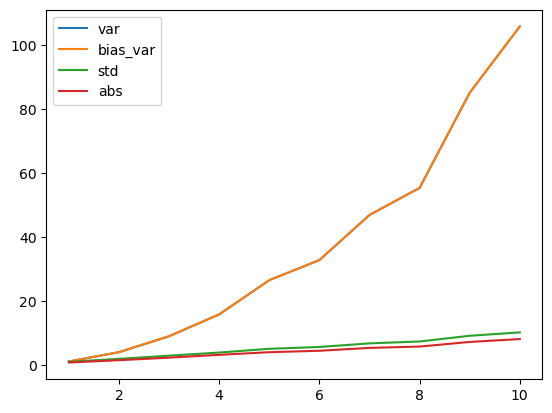

In [30]:
# lets show case between the 2 types of variance
variance=np.arange(1,11)
n=300
variance_measure=np.zeros((4,len(variance)))

for i in range(len(variance)):
    data=np.random.randn(n)*variance[i]
    datacent=data-np.mean(data)

    #variance 
    variance_measure[0,i]=sum(datacent**2)/(n-1)
    
    #biased measure
    variance_measure[1,i]=sum(datacent**2)/(n-1)
    
    #standard devaitation
    variance_measure[2,i]=np.sqrt(sum(datacent**2)/(n-1))
    
    #mean absolute value
    variance_measure[3,i]=sum(abs(datacent))/(n-1)

plt.plot(variance,variance_measure.T)
plt.legend(("var","bias_var","std","abs"))
plt.show()

# FANO FACTOR AND COEFICIENT OF VARIATION

## FANO FACTOR

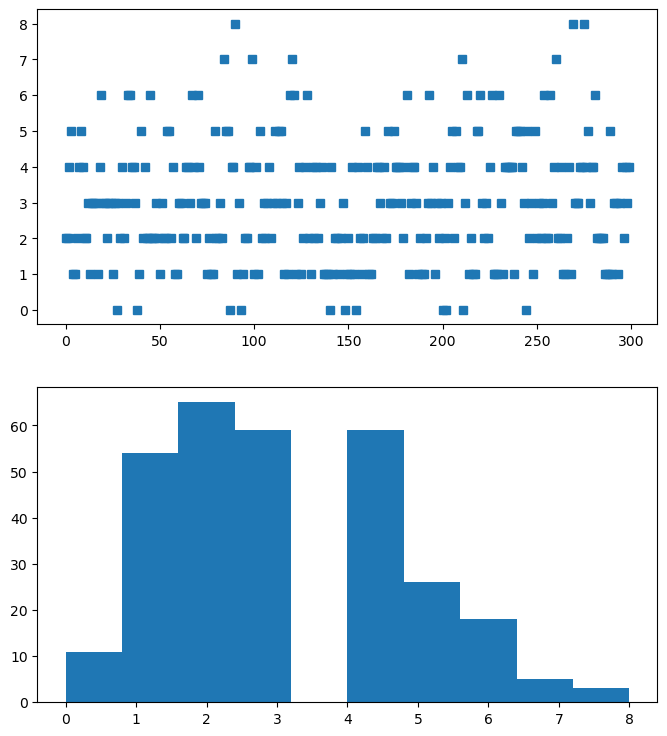

In [40]:
a=np.random.poisson(3,300)
fig,ax=plt.subplots(2,1,figsize=(8,9))
ax[0].plot(a,'s')
ax[1].hist(a)
plt.show()

## cv or the Coeficient Variation

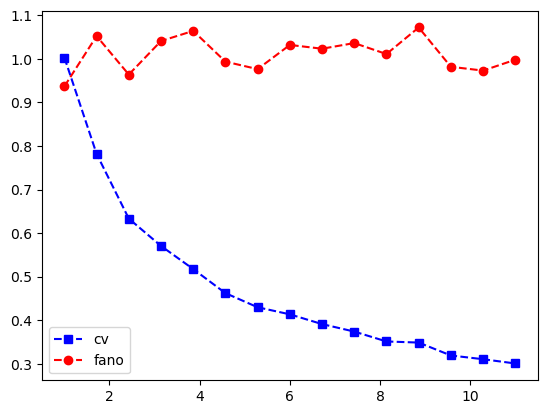

In [48]:
lambdas=np.linspace(1,11,15)
cv=np.zeros(len(lambdas))
fano=np.zeros(len(lambdas))

#computing time
for i in range(len(lambdas)):
    data=np.random.poisson(lambdas[i],1000)
    cv[i]=np.std(data)/np.mean(data)
    fano[i]=np.var(data)/np.mean(data)
    
plt.plot(lambdas,cv,'bs--')
plt.plot(lambdas,fano,'ro--')
plt.legend(("cv","fano"))
plt.show()